In [36]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
#Loading the dataset
X = pd.read_csv("train_features_improved.csv")
# X_small = np.array(df1.iloc[:, :].values,  dtype=float)[::12]
# X = np.array(df1.iloc[:, :].values,  dtype=float)
# df = pd.DataFrame(X, columns = df1.columns)

Y = pd.read_csv("train_labels.csv")
# Y = np.array(labels_df.iloc[:, :].values,  dtype=float)

print(X.shape)
print(Y.shape)



(18995, 514)
(18995, 16)


<AxesSubplot:xlabel='0', ylabel='LABEL_Sepsis'>

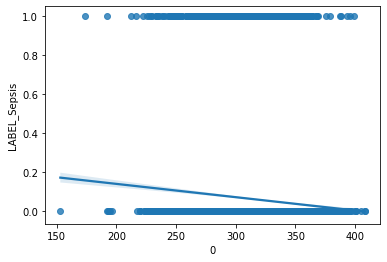

In [33]:
# sns.scatterplot(x=X['0'], y=Y['LABEL_Heartrate'], hue=Y['LABEL_Sepsis'])
sns.regplot(x=X['0'], y=Y['LABEL_Sepsis'])

<AxesSubplot:>

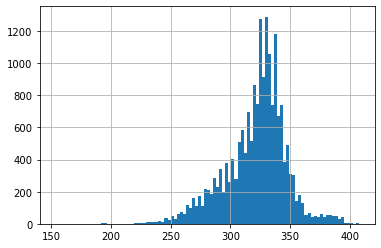

In [34]:
X["0"].hist(bins=100)
# np.log(X["0"]).hist(bins=100)

In [38]:
# for label in ['LABEL_Sepsis']:
for label in ['LABEL_Heartrate']:
# for label in ['LABEL_SpO2']:
# for label in ['LABEL_Sepsis','LABEL_BaseExcess', 'LABEL_Fibrinogen', 'LABEL_AST', 'LABEL_Alkalinephos', 'LABEL_Bilirubin_total', 'LABEL_Lactate', 'LABEL_TroponinI', 'LABEL_SaO2', 'LABEL_Bilirubin_direct', 'LABEL_EtCO2', 'LABEL_RRate', 'LABEL_ABPm', 'LABEL_SpO2', 'LABEL_Heartrate']:
    X[label] = Y[label]
    cor = X.corr()
    # cor = Y.corr()
    #Correlation with output variable
    # cor_target = abs(cor[label])
    cor_target = cor[label]
    #Selecting highly correlated features
    relevant_features = cor_target[cor_target>-1]
    #sort
    relevant_features.sort_values(inplace=True, ascending=False)
    pd.set_option('display.float_format', lambda x: '%.9f' % x)
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(relevant_features)
    # print(relevant_features)
    # display(relevant_features)
    # print("\n ")

# df["sepsis"] = Y2
# cor = X.corr()
# df.head()
# print(df.shape)

LABEL_Heartrate                1.000000000
pH_8                           0.789683658
Bilirubin_total_10             0.777578796
Chloride_12                    0.760087456
SpO2_2                         0.747084116
ABPd_4                         0.730923843
ABPm_6                         0.718935526
Platelets_8                    0.699419959
PaCO2_10                       0.683841538
Phosphate_12                   0.664859328
RRate_2                        0.646740035
Hgb_4                          0.625825732
BUN_6                          0.619830921
pH_12                          0.150422442
TroponinI_2                    0.150413529
Hct_4                          0.150393446
ABPd_8                         0.150360800
SpO2_6                         0.150356181
ABPm_10                        0.150318216
Platelets_12                   0.150269102
AST_2                          0.150218850
WBC_4                          0.150162242
RRate_6                        0.150107462
Hgb_8      

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, Y['LABEL_Sepsis'])
mi_scores

LABEL_Sepsis    0.212523
ABPs_6          0.019662
Hgb_11          0.017857
Temp_2          0.016963
WBC_12          0.016746
                  ...   
Chloride_9      0.000000
RRate_12        0.000000
Hct_2           0.000000
Hct_5           0.000000
pid             0.000000
Name: MI Scores, Length: 515, dtype: float64

In [ ]:
mi_scores

LABEL_Sepsis    0.212523
ABPs_6          0.019662
Hgb_11          0.017857
Temp_2          0.016963
WBC_12          0.016746
                  ...   
Chloride_9      0.000000
RRate_12        0.000000
Hct_2           0.000000
Hct_5           0.000000
pid             0.000000
Name: MI Scores, Length: 515, dtype: float64

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
# cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()